### UAS PMPM VGG-16
- Vinciant Andra Kaisarea
- 220711902
- Keras
- Cabai (Rawit, Keriting, Hijau)
- VGG-16


In [22]:
#Import library
import os
import numpy as np

#Import library tensorflow dan modul keras yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

#Penjelasan
# layers digunakan untuk menambahkan lapisan ke dalam model
# load_img digunakan untuk memuat gambar
# ImageDataGenerator digunakan untuk melakukan augmentasi pada gambar
# Sequential digunakan untuk membuat model secara berurutan
# Conv2D digunakan untuk membuat lapisan konvolusi
# MaxPooling2D digunakan untuk melakukan pooling pada lapisan konvolusi
# Dense digunakan untuk membuat lapisan fully connected
# Dropout digunakan untuk menghindari overfitting
# Flatten digunakan untuk membuat lapisan menjadi flat (rata) menjadi vektor 1 dimensi

In [23]:
count = 0 #digunakan untuk menghitung jumlah gambar
dirs = os.listdir(r"D:\UAJY Kuliah Andra 220711902\Matkul\Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam B\99 UAS\PMDPM_B_Keras\train_data")
for dir in dirs:
    files = list(os.listdir(r"D:\UAJY Kuliah Andra 220711902\Matkul\Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam B\99 UAS\PMDPM_B_Keras\train_data/"+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Hijau Folder has 100 Images
Keriting Folder has 100 Images
Rawit Folder has 100 Images
Images Folder has 300 Images


In [24]:
# Parameter
base_dir = r"D:\UAJY Kuliah Andra 220711902\Matkul\Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam B\99 UAS\PMDPM_B_Keras\train_data" #direktori folder dataset
img_size = 224 #mengubah ukuran gambar menjadi 180
batch = 32 #jumlah sample (gambar) yang akan diproses pada satu kali iterasi
validation_split = 0.1 #data pelatihan yang akan digunakan sebagai data validasi

In [25]:
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir, #path direktori, subfolder dianggap sebagai label
    seed=123, #untuk memastikan proses pemisahan data selalu konsisten (random_state)
    image_size=(img_size, img_size), #ukuran gambar diubah (resize) menjadi 224x224 pixel
    batch_size=batch, #jumlah gambar yang akan dikelompokkan 
)

Found 300 files belonging to 3 classes.


In [26]:
#mendapatkan nama kelas dari dataset 
class_names = dataset.class_names #dataset.class_names akan mengambil daftar nama kelas berdasarkan subfolder di dalam direktori
print("Class Names:", class_names)

Class Names: ['Hijau', 'Keriting', 'Rawit']


In [27]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

Total Images: 10
Train Images: 9
Validation Images: 1


In [28]:
train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

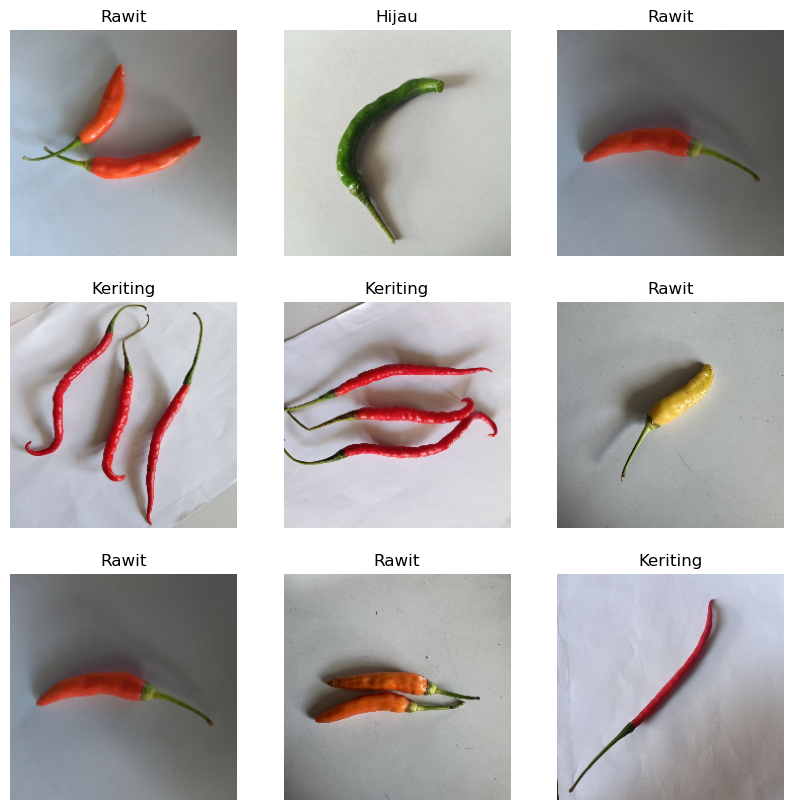

In [29]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10)) #membuat figure dengan ukuran 10x10 inchi untuk menampilkan gambar


for images, labels in train_ds.take(1): #mengambil 1 batch pertama dari train_ds
    for i in range(9):
        plt.subplot(3,3, i+1) #menyiapkan subplot dengan grid 3x3 dan menempatkan gambar pada posisi i+1
        plt.imshow(images[i].numpy().astype('uint8')) #menampilkan gambar dan mengonversi ke tipe uint8
        plt.title(class_names[labels[i]]) #menampilkan judul gambar sesuai dengan nama kelas
        plt.axis('off') #menonaktifkan sumbu pada gambar agar tidak terlihat

In [30]:
import numpy as np

# Tampilkan gambar dengan shape 
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)  # Output
    

(32, 224, 224, 3)


In [31]:
AUTOTUNE = tf.data.AUTOTUNE

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [33]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [34]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)), #membalik gambar secara horizontal
    layers.RandomRotation(0.1), #merotasi gambar secara acak dalam kisaran 0°-36° (0.1 * 360)
    layers.RandomZoom(0.1) #melakukan zoom in/zoom out secara acak dengan rentang 10%
])

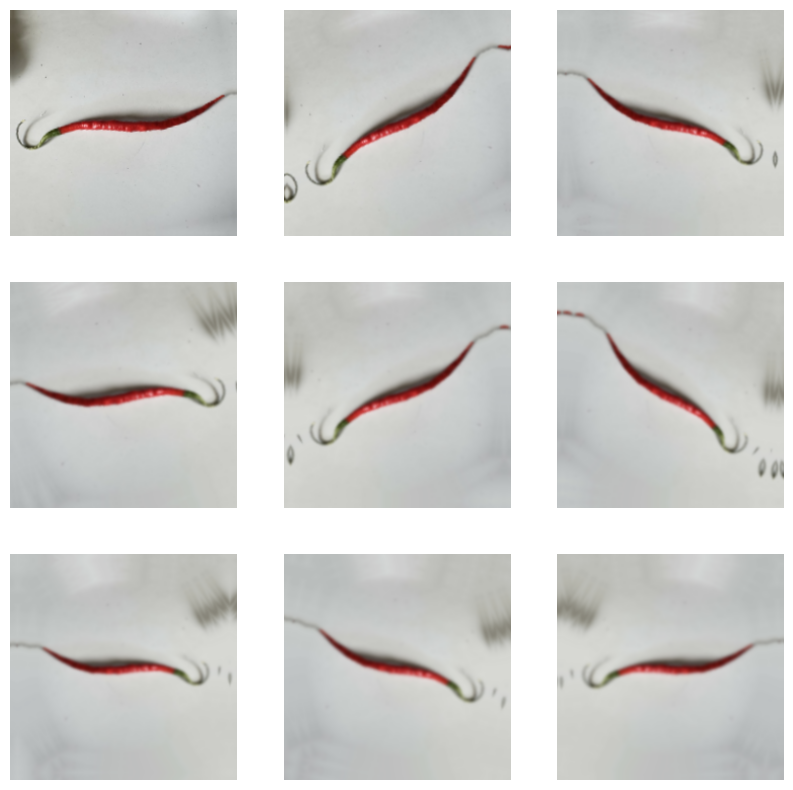

In [35]:
#sama seperti sebelumnya, code ini digunakan untuk menampilkan gambar dari data_augmentation
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [36]:
from tensorflow.keras import layers, Sequential

def create_vgg16(input_shape, num_classes):
    model = Sequential([
        # Input Layer
        layers.Input(shape=input_shape),

        # Convolutional Block 1 
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 2
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'), 
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 3
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 4
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Convolutional Block 5
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  
    ])
    return model

# Contoh penggunaan
img_size = 224
input_shape = (img_size, img_size, 3)
num_classes = len(class_names)  # Jumlah kelas

vgg16_model = create_vgg16(input_shape, num_classes)


In [37]:
from tensorflow.keras.optimizers import Adam #untuk mengoptimalkan proses pelatihan model

#mengkompilasi model dengan optimizer, loss function, dan metrics
vgg16_model.compile(
    optimizer=Adam(learning_rate=1e-4), #menggunakan optimizer Adam dengan learning rate 0.0001
    loss='sparse_categorical_crossentropy', #untuk klasifikasi multi-kelas
    metrics=['accuracy'] #akurasi digunakan sebagai metrik evaluasi
)

In [38]:
#menampilkan ringkasan dari model
vgg16_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#early stopping digunakan untuk menghentikan pelatihan lebih awal jika model tidak ada peningkatan
from tensorflow.keras.callbacks import EarlyStopping

#Ada fungsi early stopping disini, jangan keskip tuan :D
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               mode='max')
#melatih model menggunakan data latih dan validasi dengan early stopping
history= vgg16_model.fit(train_ds, #data pelatihan yang telah disiapkan
                   epochs=40, # jumlah maksimal epoch
                   validation_data=val_ds,  #data validasi untuk mengevaluasi model pada setiap epoch
                   callbacks=[early_stopping]) #menambahkan early stopping ke dalam callback untuk pelatihan

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.3575 - loss: 1.8235 - val_accuracy: 0.2500 - val_loss: 1.1173
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.4128 - loss: 1.0755 - val_accuracy: 0.4167 - val_loss: 0.8868
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6201 - loss: 0.8589 - val_accuracy: 0.7500 - val_loss: 1.1883
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.7585 - loss: 0.7605 - val_accuracy: 0.9167 - val_loss: 0.3455
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9521 - loss: 0.2479 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9420 - loss: 0.1407 - val_accuracy: 0.8333 - val_loss: 0.4521
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9599 - loss: 0.0962 - val_accuracy: 1.0000 - val_loss: 5.3107e-04
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9756 - loss: 0.0752 - val_accuracy: 1.0000 - val_loss: 0.0475
Epoc

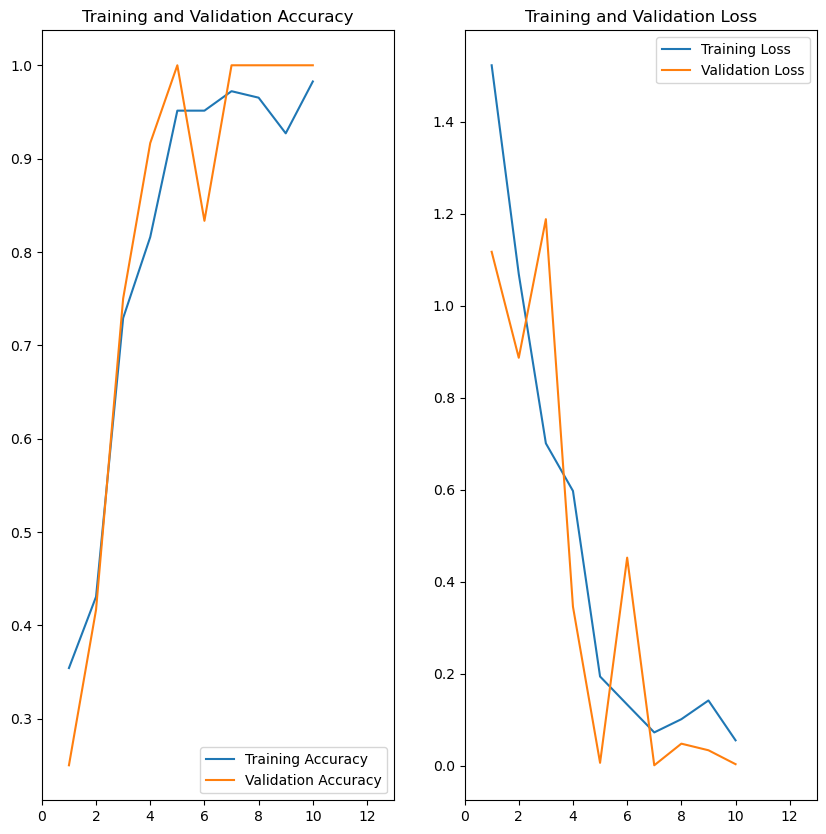

In [40]:
#membuat range untuk epoch berdasarkan panjang data loss dari pelatihan
ephocs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10)) #membuat figure dengan ukuran 10x10 untuk menampilkan 2 grafik (Training and Validation Accuracy dan Loss)

#grafik pertama (Training and Validation Accuracy)
plt.subplot(1, 2, 1) #membuat subplot pertama dalam layout 1 baris dan 2 kolom
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy') #plot akurasi pelatihan 
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy') #plot akurasi validasi
plt.legend(loc='lower right') #membuat legenda (informasi elemen visual) di sudut kanan bawah
plt.xlim(0, 13) #mengatur batas nilai pada sumbu x dari epoch 1 sampai 13
plt.title('Training and Validation Accuracy') #memberi judul grafik

#grafik kedua (Training and Validation Loss)
plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(0, 13)
plt.title('Training and Validation Loss')
plt.show()

In [41]:
#menyimpan model yang telah dilatih
vgg16_model.save('BestModel_VGG16_Keras.h5')

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

#memuat model yang sudah dilatih
vgg16_model = load_model(r"D:\UAJY Kuliah Andra 220711902\Matkul\Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam B\99 UAS\PMDPM_B_Keras\BestModel_VGG16_Keras.h5") 
class_names = ['Hijau', 'Keriting', 'Rawit'] #kelas yang ada pada model

#fungsi untuk mengklasifikasikan gambar dan menyimpan gambar asli
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        #memuat dan mempersiapkan gambar untuk prediksi
        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224)) #membuat gambar dari path dan mnegubah ukurannya menjadi 180x180 pixel
        input_image_array = tf.keras.utils.img_to_array(input_image) #mengubah gambar jadi array numpy agar bisa di proses model
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  #menambahkan dimensi batch agar sesuai dengan input model
                                                                    

        #melakukan prediksi
        predictions = vgg16_model.predict(input_image_exp_dim) #melakukan prediksi pada gambar yang telah diproses
        result = tf.nn.softmax(predictions[0]) #menghitung hasil prediksi menggunakan softmax untuk mendapatkan probabilitas tiap kelas
        class_idx = np.argmax(result) #menemukan indeks kelas dengan probabilitas tertinggi
        confidence = np.max(result) * 100 #menghitung confidence dalam persentase

        #menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}") #menampilkan nama kelas yang diprediksi 
        print(f"Confidence: {confidence:.2f}%") #menampilkan nilai confidence

        #menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path) #membuka gambar yang ada di path
        input_image.save(save_path) #menyimpan gambar asli ke dalam path yang telah ditentukan

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r"D:\UAJY Kuliah Andra 220711902\Matkul\Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam B\99 UAS\PMDPM_B_Keras\test_data\Keriting\Keriting (116).jpg", save_path='keritingTest.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Prediksi: Keriting
Confidence: 57.50%
Prediksi: Keriting dengan confidence 57.50%. Gambar asli disimpan di keritingTest.jpg.


Found 60 files belonging to 3 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


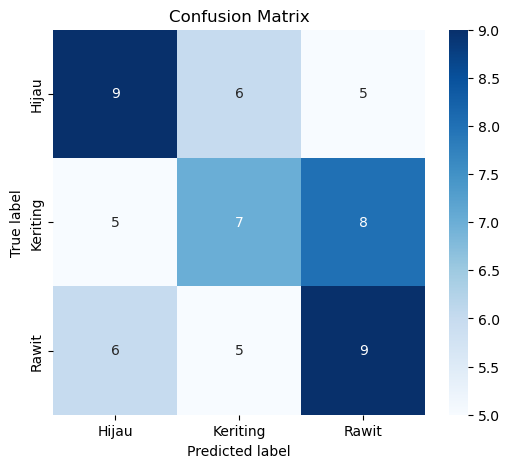

Confusion Matrix:
 [[9 6 5]
 [5 7 8]
 [6 5 9]]
Akurasi: 0.4166666666666667
Presisi: [0.45       0.38888889 0.40909091]
Recall: [0.45 0.35 0.45]
F1 Score: [0.45       0.36842105 0.42857143]


In [94]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

#memuat model yang telah dilatih sebelumnya
vgg16_model = load_model(r"D:\UAJY Kuliah Andra 220711902\Matkul\Semester 5\Pembelajaran Mesin dan Pembelajaran Mendalam B\99 UAS\PMDPM_B_Keras\BestModel_VGG16_Keras.h5")

#memuat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data', #direktori data uji
    labels='inferred', #label otomatis dari subfolder yang ada
    label_mode='categorical',  #menghasilkan label dalam bentuk one-hot encoding
    batch_size=32, #ukuran batch untuk pemrosesan
    image_size=(224, 224) #ukuran gambar yang akan diproses
)

#prediksi model
y_pred = vgg16_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  #konversi ke kelas prediksi

#ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = [] #menyimpan label asli dalam bentuk indeks
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  #konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels) #mengkonversi list ke tensor untuk perhitungan

#membuat confusion matrix untuk evaluasi
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

#menghitung akurasi berdasarkan confusion matrix
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

#mnghitung presisi dan recall dari confusion matrix
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

#menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

#visualisasi Confusion Matrix
plt.figure(figsize=(6, 5)) #mengatur ukuran gambar
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', #annot=True untuk menampilkan angka di dalam setiap sel matriks
                                                                 #fmt='d' untuk menampilkan bilangan bulat tanpa desimal
            xticklabels=["Hijau", "Keriting", "Rawit"], yticklabels=["Hijau", "Keriting", "Rawit"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
